In [2]:
# The first steps:
# Will ingest/clean data and create/load the following:
# 1. cleaned text translated to array of word indices: imdb_indices.pickle
# 2. word2vec model, where the indices/word vecs are stored:  300features_40minwords_10context
# 3. word embeddings: this is the index to wordvec mapping derived from 2.


from lib import features_word2vec, model_lstm_tf
import pandas as pd
import os

labeled_data_path = "./data/labeledTrainData.tsv"
unlabeled_data_path = "./data/unlabeledTrainData.tsv"
model_path = "./model/300features_40minwords_10context"
embedding_path = "./model/embedding_weights.pkl"
text2indices_path = "./model/imdb_indices.pickle"


def data_prep():
    # Read data
    # Use the kaggle Bag of words vs Bag of popcorn data:
    # https://www.kaggle.com/c/word2vec-nlp-tutorial/data

    data = pd.read_csv(labeled_data_path, header=0,
                       delimiter="\t", quoting=3, encoding="utf-8")

    data2 = pd.read_csv(unlabeled_data_path, header=0,
                        delimiter="\t", quoting=3, encoding="utf-8")

    # data2 and data are combined to train word2vec model
    data2 = data.append(data2)

    model = features_word2vec.get_word2vec_model(data2, "review", num_features=300, downsampling=1e-3, model_path=model_path)
    embedding_weights = features_word2vec.create_embedding_weights(model)
    features = features_word2vec.get_indices_word2vec(data, "review", model, maxLength=500,
                                                      writeIndexFileName="./model/imdb_indices.pickle", padLeft=True)
    return model, embedding_weights, features

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
data_prep()

(<gensim.models.word2vec.Word2Vec at 0x104c1dc50>,
 array([[ 0.10585845, -0.05332218,  0.02788348, ..., -0.05418135,
          0.06534412, -0.0199977 ],
        [-0.01134798,  0.00097455, -0.01262519, ...,  0.00096706,
         -0.01948956, -0.00314009],
        [-0.0214931 , -0.1459033 ,  0.07035182, ..., -0.04496352,
          0.04403584, -0.06980642],
        ..., 
        [ 0.06123403, -0.04089059, -0.01340766, ..., -0.03233384,
         -0.10336776, -0.0290222 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[   0,    0,    0, ...,   22,    0, 1645],
        [   0,    0,    0, ...,   27,   91, 5757],
        [   0,    0,    0, ..., 1352,    3, 5403],
        ..., 
        [   0,    0,    0, ...,  231,   27,  333],
        [   0,    0,    0, ...,   14,   81,   76],
        [   0,    0,    0, ...,   13,    2,  487]], 

In [5]:
# Use no attention first 
# Train with five epochs 
# For each epoch, print out the accuracy on the hold-out set
model1 = model_lstm_tf.LstmTFModel(useAttention=False, restore=False) 
model1.train_epochs(5)
model1.test()

(128, 64)
Epoch 0:

Iter 0, Minibatch Loss= 0.690229, Training Accuracy= 0.57031
Iter 50, Minibatch Loss= 0.592788, Training Accuracy= 0.64844
Iter 100, Minibatch Loss= 0.462448, Training Accuracy= 0.81250
Iter 150, Minibatch Loss= 0.456239, Training Accuracy= 0.79688
Testing accuracy = 0.52995
saved to ./model/pretrained_lstm_tf.model
Epoch 1:

Iter 0, Minibatch Loss= 1.430585, Training Accuracy= 0.56250
Iter 50, Minibatch Loss= 0.674530, Training Accuracy= 0.57812
Iter 100, Minibatch Loss= 0.638553, Training Accuracy= 0.67969
Iter 150, Minibatch Loss= 0.520375, Training Accuracy= 0.75000
Testing accuracy = 0.82378
Epoch 2:

Iter 0, Minibatch Loss= 0.399270, Training Accuracy= 0.84375
Iter 50, Minibatch Loss= 0.443942, Training Accuracy= 0.79688
Iter 100, Minibatch Loss= 0.360969, Training Accuracy= 0.83594
Iter 150, Minibatch Loss= 0.389484, Training Accuracy= 0.85938
Testing accuracy = 0.89844
Epoch 3:

Iter 0, Minibatch Loss= 0.349237, Training Accuracy= 0.86719
Iter 50, Minibatch 

In [6]:
# Now run model with attention 
model2 = model_lstm_tf.LstmTFModel(useAttention=True, restore=False ) 
model2.train_epochs(5)
model2.test()

(128, 64)
Epoch 0:

Iter 0, Minibatch Loss= 0.690287, Training Accuracy= 0.53125
Iter 50, Minibatch Loss= 0.518388, Training Accuracy= 0.75000
Iter 100, Minibatch Loss= 0.447742, Training Accuracy= 0.81250
Iter 150, Minibatch Loss= 0.456062, Training Accuracy= 0.77344
Testing accuracy = 0.87066
saved to ./model/pretrained_lstm_tf.model
Epoch 1:

Iter 0, Minibatch Loss= 0.376639, Training Accuracy= 0.83594
Iter 50, Minibatch Loss= 0.356565, Training Accuracy= 0.85938
Iter 100, Minibatch Loss= 0.359166, Training Accuracy= 0.83594
Iter 150, Minibatch Loss= 0.248117, Training Accuracy= 0.92969
Testing accuracy = 0.91884
Epoch 2:

Iter 0, Minibatch Loss= 0.266340, Training Accuracy= 0.89062
Iter 50, Minibatch Loss= 0.342623, Training Accuracy= 0.85156
Iter 100, Minibatch Loss= 0.279518, Training Accuracy= 0.86719
Iter 150, Minibatch Loss= 0.328646, Training Accuracy= 0.86719
Testing accuracy = 0.90061
Epoch 3:

Iter 0, Minibatch Loss= 0.321027, Training Accuracy= 0.87500
Iter 50, Minibatch 

In [7]:
# Now restore checkpoint from model2 
# And continue to train for a single epoch 
model3 = model_lstm_tf.LstmTFModel(useAttention=True, restore=True ) 
model3.train_epoch(1)
model3.test()

INFO:tensorflow:Restoring parameters from ./model/pretrained_lstm_tf.model-0


INFO:tensorflow:Restoring parameters from ./model/pretrained_lstm_tf.model-0


Epoch 0:

Iter 0, Minibatch Loss= 0.348454, Training Accuracy= 0.85938
Iter 50, Minibatch Loss= 0.386253, Training Accuracy= 0.82031
Iter 100, Minibatch Loss= 0.348698, Training Accuracy= 0.87500
Iter 150, Minibatch Loss= 0.391788, Training Accuracy= 0.78906
Testing accuracy = 0.91363
saved to ./model/pretrained_lstm_tf.model
training finished.
Testing accuracy = 0.91536


In [4]:
model3.plot_attention(ind=3)

NameError: name 'model3' is not defined

(500, 1)


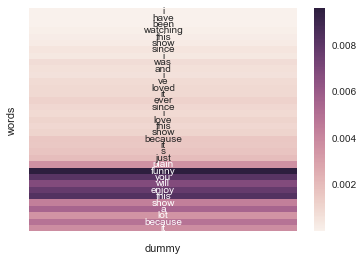

In [25]:
# For this particular text segment, attention is focused on 
# words indicating positive sentiment, such as "funny", and "enjoy" 
model3.plot_attention(ind=16)

(500, 1)


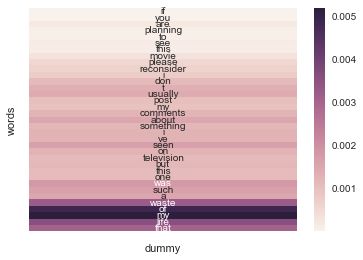

In [42]:
# For this particular text segments, the attention is focused on 
# a phrase indicating negative sentiment:
# "waste of my life"
model3.plot_attention(ind=10)